In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [6]:
datasets = {
    "raw_data_age": pd.read_csv("../data/IRCC_AdhocSR_PR_0001_E.csv", index_col=0),
    "raw_data_census": pd.read_csv("../data/IRCC_AdhocSR_PR_0002_E.csv", encoding='ISO-8859-1', index_col=0),
    "raw_data_birth_country": pd.read_csv("../data/IRCC_AdhocSR_PR_0003_E.csv", index_col=0),
    "raw_data_citizenship": pd.read_csv("../data/IRCC_AdhocSR_PR_0004_E.csv", index_col=0),
    "raw_data_education": pd.read_csv("../data/IRCC_AdhocSR_PR_0005_E.csv",index_col=0),
    "raw_data_gender": pd.read_csv("../data/IRCC_AdhocSR_PR_0006_E.csv", index_col=0),
    "raw_data_legal_status": pd.read_csv("../data/IRCC_AdhocSR_PR_0007_E.csv", index_col=0),
    "raw_data_noc": pd.read_csv("../data/IRCC_AdhocSR_PR_0008_E.csv",index_col=0),
    "raw_data_preferred_language": pd.read_csv("../data/IRCC_AdhocSR_PR_0009_E.csv", encoding='ISO-8859-1', index_col=0),
    "raw_data_province": pd.read_csv("../data/IRCC_AdhocSR_PR_0010_E.csv", index_col=0),
    "raw_data_skill_level_1": pd.read_csv("../data/IRCC_AdhocSR_PR_0011_E.csv", index_col=0),
    "raw_data_skill_level_2": pd.read_csv("../data/IRCC_AdhocSR_PR_0012_E.csv", index_col=0),
}

In [7]:
from pprint import pprint

for dataset in datasets.values():
    dataset.reset_index(inplace=True)
        # Check and convert 'persons_count' if it exists
    if "persons_count" in dataset.columns:
        dataset["persons_count"] = pd.to_numeric(dataset["persons_count"], errors="coerce")
    
    # Alternatively, check and convert 'permit_holders' if it exists
    elif "permit_holders" in dataset.columns:
        dataset["permit_holders"] = pd.to_numeric(dataset["permit_holders"], errors="coerce")

    # Check and rename 'persons_count' if it exists
    if "persons_count" in dataset.columns:
        new_name = f"persons_count_{dataset.columns[2][:5]}"
        dataset.rename(columns={"persons_count": new_name}, inplace=True)
    
    # Check and rename 'permit_holders' if it exists
    if "permit_holders" in dataset.columns:
        new_name = f"permit_holders_{dataset.columns[2][:5]}"
        dataset.rename(columns={"permit_holders": new_name}, inplace=True)
    
    # dataset.rename(columns={col: col + dataset.columns[2][:5] for col in dataset.columns if col != 'landing_year'}, inplace=True)
    
    # print(dataset.info())
    # pprint(dataset.sample(5))
    # pprint(dataset.columns)

In [8]:
for dataset in datasets.values():
    pprint(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   persons_count_perso         118 non-null    float64
 1   landing_year                119 non-null    int64  
 2   person_age_level1_eng_desc  119 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   persons_count_censu                2637 non-null   float64
 1   landing_year                       2749 non-null   int64  
 2   census_metropolitan_area_eng_desc  2749 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 64.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [28]:
datasets["raw_data_noc"]["landing_year"].describe()

count     128.000000
mean     2008.281250
std         4.900486
min      2000.000000
25%      2004.000000
50%      2008.500000
75%      2012.250000
max      2016.000000
Name: landing_year, dtype: float64

In [28]:
datasets["raw_data_noc"]["landing_year"].describe()

count     128.000000
mean     2008.281250
std         4.900486
min      2000.000000
25%      2004.000000
50%      2008.500000
75%      2012.250000
max      2016.000000
Name: landing_year, dtype: float64

In [9]:
raw_data = pd.read_csv("../data/ODP-PR-CSD.csv", delimiter='\t', index_col=0) # ODP-PR-CSD.csv
raw_data.reset_index(inplace=True)

In [10]:
raw_data.sample(5)

,EN_YEAR,EN_QUARTER,EN_MONTH,FR_ANNEÉ,FR_TRIMESTRE,FR_MOIS,EN_PROVINCE_TERRITORY,FR_PROVINCE_TERRITOIRE,EN_CENSUS_DIVISION,FR_DIVISION_DE_RECENSEMENT,EN_CENSUS_SUBDIVISION,FR_SUBDIVISION_DE_RECENSEMENT,Total
10751,2016,Q3,Aug,2016,T3,août,Ontario,Ontario,Cochrane,Cochrane,Cochrane,Cochrane,5
55571,2022,Q2,May,2022,T2,mai,Ontario,Ontario,Grey,Grey,Southgate,Southgate,--
43379,2021,Q1,Jan,2021,T1,janv.,Prince Edward Island,Île-du-Prince-Édouard,Queens,Queens,Charlottetown,Charlottetown,75
41311,2020,Q4,Dec,2020,T4,déc.,British Columbia,Colombie-Britannique,Comox Valley,Comox Valley,Comox,Comox,--
36333,2019,Q4,Oct,2019,T4,oct.,Manitoba,Manitoba,Division No. 7,Division No. 7,Brandon,Brandon,85


In [11]:
clean_data = raw_data.drop(columns=[
    # 'EN_QUARTER',
    # 'EN_MONTH',
    'FR_ANNEÉ',
    'FR_TRIMESTRE',
    'FR_MOIS',
    # 'EN_PROVINCE_TERRITORY',
    'FR_PROVINCE_TERRITOIRE',
    # 'EN_CENSUS_DIVISION',
    'FR_DIVISION_DE_RECENSEMENT',
    # 'EN_CENSUS_SUBDIVISION',
    'FR_SUBDIVISION_DE_RECENSEMENT'
])

In [12]:
clean_data.sample(5)

,EN_YEAR,EN_QUARTER,EN_MONTH,EN_PROVINCE_TERRITORY,EN_CENSUS_DIVISION,EN_CENSUS_SUBDIVISION,Total
59740,2022,Q4,Oct,Ontario,Northumberland,Port Hope,--
29739,2019,Q1,Jan,Saskatchewan,Division No. 16,Borden,--
35960,2019,Q4,Nov,Quebec,Mirabel,Mirabel,--
56735,2022,Q3,Jul,Ontario,Prescott and Russell,Hawkesbury,--
28661,2018,Q4,Oct,Saskatchewan,Division No. 8,Eston,--


In [13]:
clean_data.rename(columns={column: column.replace("EN_", "").lower() for column in clean_data.columns}, inplace=True)
clean_data.sample(5)

,year,quarter,month,province_territory,census_division,census_subdivision,total
20450,2017,Q4,Nov,Newfoundland and Labrador,Division No. 7,Clarenville,10
7624,2016,Q1,Jan,Saskatchewan,Division No. 15,Humboldt,10
18142,2017,Q3,Aug,Alberta,Division No. 6,Cochrane,5
68006,2023,Q4,Nov,Alberta,Division No. 17,High Prairie,--
18628,2017,Q3,Jul,Ontario,Middlesex,Adelaide-Metcalfe,--


In [14]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                69987 non-null  int64 
 1   quarter             69987 non-null  object
 2   month               69987 non-null  object
 3   province_territory  69987 non-null  object
 4   census_division     69987 non-null  object
 5   census_subdivision  69987 non-null  object
 6   total               69987 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.7+ MB


In [15]:
clean_data.sample()

,year,quarter,month,province_territory,census_division,census_subdivision,total
61699,2023,Q1,Jan,Saskatchewan,Division No. 8,Swift Current,35


In [16]:
month_to_num = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
clean_data["month"] = clean_data["month"].replace(month_to_num)

/tmp/ipykernel_34594/2405731097.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data["month"] = clean_data["month"].replace(month_to_num)


In [17]:
quarter_to_number = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
clean_data["quarter"] = clean_data["month"].replace(quarter_to_number)

In [18]:
clean_data["total"] = clean_data["total"].replace("--", 0)

In [19]:
clean_data["total"] = pd.to_numeric(clean_data["total"])

In [20]:
clean_data["total"].sum()  # with zeros

2980850

In [21]:
# Select indices where values are 0
zero_indices = clean_data.index[clean_data['total'] == 0].tolist()

# Shuffle indices
np.random.shuffle(zero_indices)

# Divide into two parts
mid_point = len(zero_indices) // 2
first_part, second_part = zero_indices[:mid_point], zero_indices[mid_point:]

# Replace values
clean_data.loc[first_part, 'total'] = 1
clean_data.loc[second_part, 'total'] = 2

In [22]:
clean_data["total"].sum()  # with zeros

3045088

In [23]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   year                69987 non-null  int64 
 1   quarter             69987 non-null  int64 
 2   month               69987 non-null  int64 
 3   province_territory  69987 non-null  object
 4   census_division     69987 non-null  object
 5   census_subdivision  69987 non-null  object
 6   total               69987 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 3.7+ MB


In [25]:
clean_data.sample(5)

,year,quarter,month,province_territory,census_division,census_subdivision,total
6106,2015,11,11,Ontario,Elgin,St. Thomas,1
42627,2020,10,10,Manitoba,Division No. 2,Ste. Anne,2
3558,2015,8,8,Quebec,Abitibi-Ouest,Macamic,1
19351,2017,9,9,British Columbia,Comox Valley,Courtenay,5
46086,2021,5,5,Quebec,Montréal,Pointe-Claire,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd


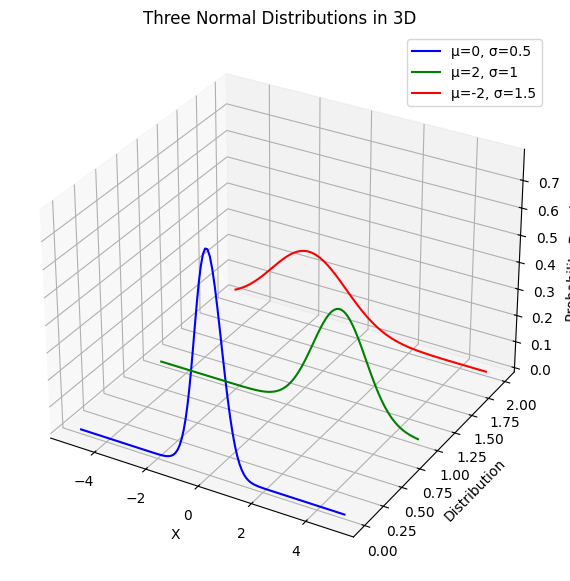

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Parameters for the normal distributions
mu = [0, 2, -2]  # Means of the distributions
sigma = [0.5, 1, 1.5]  # Standard deviations of the distributions
colors = ['blue', 'green', 'red']  # Colors for each distribution

# Create a figure for plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Generating data and plotting each normal distribution
x = np.linspace(-5, 5, 120)
for i in range(len(mu)):
    y = norm.pdf(x, mu[i], sigma[i])
    z = np.full_like(y, i)  # Creating a flat z-axis level for each distribution
    ax.plot(x, y, zs=z, zdir='y', label=f'μ={mu[i]}, σ={sigma[i]}', color=colors[i])

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Distribution')
ax.set_zlabel('Probability Density')
ax.set_title('Three Normal Distributions in 3D')
ax.legend()

# Show plot
plt.show()
